In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [2]:
base = pd.read_csv("airpassengers.csv")

In [3]:
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m")

In [5]:
base = pd.read_csv("airpassengers.csv", parse_dates=["Month"], index_col="Month", date_parser=dateparse)

In [6]:
ts = base["#Passengers"]
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

C:\Users\A8061267\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


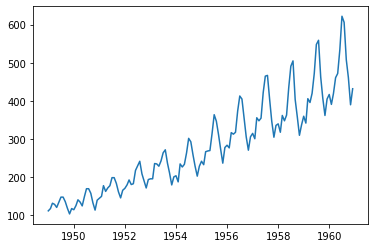

In [7]:
plt.plot(ts)

In [8]:
modelo = ARIMA(ts, order=(2,1,2)) #p,q,d

C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [9]:
modelo_treinado = modelo.fit()

In [10]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Mon, 26 Aug 2019   AIC                           1344.043
Time:                        15:42:32   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5309      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.534      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9998      0.067     14.814      0.000       0.868       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [11]:
previsoes = modelo_treinado.forecast(steps=12)[0] # Número de previsões
previsoes

array([433.10850441, 450.86776849, 479.78419347, 511.94235243,
       539.29571626, 555.78413181, 558.73965208, 549.27732375,
       531.66064056, 511.90061158, 496.02447649, 488.4970391 ])

In [12]:
for i in previsoes:
    print(i)

433.10850441113087
450.86776849317084
479.78419347103636
511.9423524282909
539.2957162624975
555.7841318050946
558.7396520829883
549.2773237459518
531.6606405562035
511.9006115826948
496.0244764937568
488.4970391020362


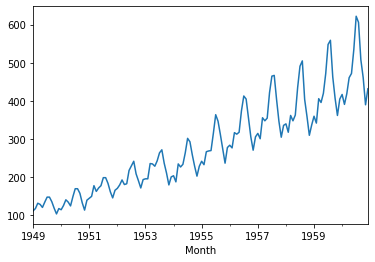

In [13]:
eixo = ts.plot()
eixo

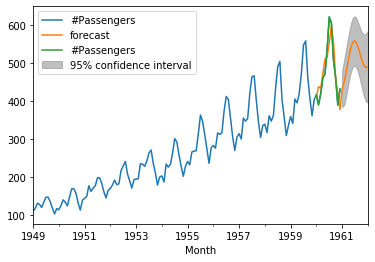

In [14]:
modelo_treinado.plot_predict("1960-01-01", "1962-01-01", ax=eixo, plot_insample=True)

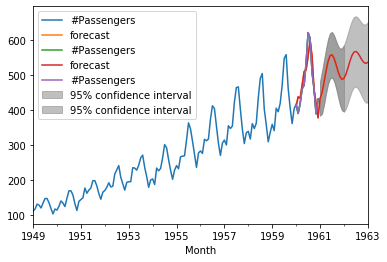

In [15]:
modelo_treinado.plot_predict("1960-01-01", "1963", ax=eixo, plot_insample=True)

In [16]:
modelo_auto = auto_arima(ts, m=12, seasonal=True, trace=True)

C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=1019.203, BIC=1042.204, Fit time=2.516 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.029 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.488 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.518 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=1019.088, BIC=1039.215, Fit time=1.850 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1018.753, BIC=1036.004, Fit time=0.910 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1026.100, BIC=1040.476, Fit time=0.334 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1020.416, BIC=1040.542, Fit time=1.037 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1017.406, BIC=1031.782, Fit time=0.738 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.159 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\A8061267\Anaconda3\lib\site-packages

Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1017.077, BIC=1034.328, Fit time=1.838 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1017.770, BIC=1037.896, Fit time=2.055 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=1015.183, BIC=1038.184, Fit time=6.459 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=1017.797, BIC=1037.923, Fit time=3.901 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=1018.061, BIC=1043.937, Fit time=8.643 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.210, BIC=1038.336, Fit time=6.114 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=1016.118, BIC=1041.995, Fit time=6.426 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1017.167, BIC=1034.419, Fit time=5.946 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(3, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=1018.613, BIC=1047.365, Fit time=7.301 seconds


C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\A8061267\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\A8061267\Anaconda3\lib\site-packages

Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 0, 12); AIC=1017.106, BIC=1037.233, Fit time=4.166 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=1020.984, BIC=1046.861, Fit time=5.963 seconds
Total fit time: 67.426 seconds


In [17]:
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -499.591
Date:                            Mon, 26 Aug 2019   AIC                           1015.183
Time:                                    15:43:41   BIC                           1038.184
Sample:                                         0   HQIC                          1024.529
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.015      0.026      0.979      -0.029       0.030
ar.L1          0.5251      0.099      5.314      0.000       0.331       0.719
ar.L2          0.2638      0.099      2.654      0.008       0.069       0.459
ma.L1         -0.9721      0.065    -14.859      0.000      -1.100      -0.844
ar.S.L12       0.7691      0.368      2.087      0.037       0.047       1.491
ar.S.L24       0.2213      0.116      1.913      0.056      -0.005       0.448
ma.S.L12      -0.9532      0.937     -1.017      0.309      -2.790       0.883
sigma2       113.0773     56.611      1.997      0.046       2.123     224.032
===================================================================================
Ljung-Box (Q):                       48.82   Jarque-Bera (JB):                10.95
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
proximos_12 = modelo_auto.predict(n_periods=12)
for i in proximos_12:
    print(i)

448.8260113287468
423.4894034626615
461.6273726502334
495.5362525776704
511.524016699004
575.6228040949585
665.5521408854439
655.1426318108862
552.1109394402083
501.43065428677136
432.9497643660313
477.1673724772407
